In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import scipy

In [2]:
def load_mnist_dataset():
    (train_validation_images, train_validation_labels), (test_images, test_labels) = mnist.load_data()
    
    train_validation_images = train_validation_images.reshape(-1, 28, 28, 1)
    test_images = test_images.reshape(-1, 28, 28, 1)
    
    train_validation_images = train_validation_images / 255.
    test_images = test_images / 255.
    
    n_train_validation = train_validation_images.shape[0]
    train_ratio = 0.8
    n_train = int(n_train_validation * train_ratio)
    
    train_x = train_validation_images[:n_train]
    train_y = train_validation_labels[:n_train]
    validation_x = train_validation_images[n_train:]
    validation_y = train_validation_labels[n_train:]
    test_x = test_images
    test_y = test_labels
    
    print('Train Set')
    print('Image : ', train_x.shape)
    print('Label : ', train_y.shape)
    print('Validation Set')
    print('Image : ', validation_x.shape)
    print('Label : ', validation_y.shape)
    print('Train & Validation Set')
    print('Image : ', test_x.shape)
    print('Label : ', test_y.shape)
    
    return train_x, train_y, validation_x, validation_y, test_x, test_y

In [3]:
train_x, train_y, validation_x, validation_y, test_x, test_y = load_mnist_dataset()

Train Set
Image :  (48000, 28, 28, 1)
Label :  (48000,)
Validation Set
Image :  (12000, 28, 28, 1)
Label :  (12000,)
Train & Validation Set
Image :  (10000, 28, 28, 1)
Label :  (10000,)


In [4]:
model = Sequential()
model.add(Conv2D(filters = 24, kernel_size = (3, 3), padding = 'same', activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
model.add(Conv2D(filters = 36, kernel_size = (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
model.add(GlobalAveragePooling2D())
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [5]:
history = model.fit(train_x, train_y, batch_size = 9, epochs = 10, verbose = 2, validation_data = (validation_x, validation_y))

Epoch 1/10
5334/5334 - 22s - loss: 1.0481 - accuracy: 0.6595 - val_loss: 0.5245 - val_accuracy: 0.8489 - 22s/epoch - 4ms/step
Epoch 2/10
5334/5334 - 17s - loss: 0.4324 - accuracy: 0.8737 - val_loss: 0.3089 - val_accuracy: 0.9116 - 17s/epoch - 3ms/step
Epoch 3/10
5334/5334 - 17s - loss: 0.3211 - accuracy: 0.9047 - val_loss: 0.2493 - val_accuracy: 0.9265 - 17s/epoch - 3ms/step
Epoch 4/10
5334/5334 - 17s - loss: 0.2678 - accuracy: 0.9197 - val_loss: 0.2177 - val_accuracy: 0.9366 - 17s/epoch - 3ms/step
Epoch 5/10
5334/5334 - 17s - loss: 0.2359 - accuracy: 0.9290 - val_loss: 0.2740 - val_accuracy: 0.9112 - 17s/epoch - 3ms/step
Epoch 6/10
5334/5334 - 17s - loss: 0.2101 - accuracy: 0.9365 - val_loss: 0.1912 - val_accuracy: 0.9445 - 17s/epoch - 3ms/step
Epoch 7/10
5334/5334 - 17s - loss: 0.1917 - accuracy: 0.9425 - val_loss: 0.1786 - val_accuracy: 0.9478 - 17s/epoch - 3ms/step
Epoch 8/10
5334/5334 - 17s - loss: 0.1748 - accuracy: 0.9476 - val_loss: 0.1516 - val_accuracy: 0.9559 - 17s/epoch - 3

In [6]:
result = model.evaluate(test_x, test_y, verbose = 2)

print('Test Loss : {:.4f}\t Test Accuracy : {:.2f}%'.format(result[0], result[1] * 100))

313/313 - 1s - loss: 0.1789 - accuracy: 0.9454 - 714ms/epoch - 2ms/step
Test Loss : 0.1789	 Test Accuracy : 94.54%


313/313 [==============================] - 1s 2ms/step
Probability is [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


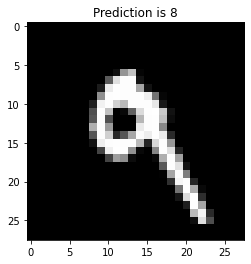

In [7]:
prediction = model.predict(test_x)
plt.imshow(test_x[7], 'gray')
print('Probability is {}'.format(prediction[7].round()))
plt.title('Prediction is {}'.format(np.argmax(prediction[7])))
plt.show()

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 24)        240       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 24)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 36)        7812      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 36)         0         
 2D)                                                             
                                                                 
 global_average_pooling2d (G  (None, 36)               0         
 lobalAveragePooling2D)                                          
                                                        

In [9]:
cam_model = Model(inputs = model.input, outputs = (model.layers[-3].output, model.layers[-1].output))
cam_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 24)        240       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 24)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 36)        7812      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 36)         0         
 2D)                                                             
                                                                 
 global_average_pooling2d (G  (None, 36)               0     

In [22]:
model.layers[-3].output

<KerasTensor: shape=(None, 7, 7, 36) dtype=float32 (created by layer 'max_pooling2d_1')>

In [15]:
print(model.layers[-1].output)

KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='dense/Softmax:0', description="created by layer 'dense'")


In [39]:
print(model.layers[-1].bias.numpy())
print(model.layers[-1].bias_initializer)

[ 0.30295077  0.35148385 -0.08626664 -0.2133629  -0.2844434  -0.05414162
 -0.01668662 -0.27703387  0.16012906  0.19024923]


In [37]:
print(model.layers[-1].weights)

[<tf.Variable 'dense/kernel:0' shape=(36, 10) dtype=float32, numpy=
array([[-0.8776192 ,  0.271461  , -0.33583996,  0.30396682, -0.571909  ,
         0.12927352,  0.4352812 , -0.30559143,  0.33340013,  0.3347698 ],
       [ 0.2641106 , -0.16112323,  0.23891385, -0.22167248,  0.45169127,
        -0.573816  , -0.15440524, -0.047962  ,  0.17798093,  0.2850938 ],
       [ 0.19874336, -0.48067918, -0.38351983, -0.5838589 ,  0.6097003 ,
        -0.6827477 , -0.3234473 ,  0.31051886,  0.10718536,  0.5836009 ],
       [ 0.47657323, -1.1409037 ,  0.19698016, -0.08680129, -0.8864408 ,
        -0.077559  , -0.35536233,  1.2055081 , -0.7606783 ,  0.609932  ],
       [ 0.30312333,  0.64203507, -0.7872754 ,  0.30432448,  0.25615686,
        -0.13711439, -0.35465288, -0.01481118,  0.0137652 , -0.12997228],
       [-0.7877987 ,  0.21792288, -0.3842483 ,  0.43372822, -0.06900644,
         0.4132189 , -0.5958278 ,  0.17958277,  0.3374714 , -0.02909195],
       [-0.24516883, -0.57078075, -0.5086711 ,  0.

In [15]:
features, results = cam_model.predict(test_x)
print('features shape : ', features.shape)
print('results shape : ', results.shape)

313/313 [==============================] - 0s 1ms/step
features shape :  (10000, 7, 7, 36)
results shape :  (10000, 10)


In [17]:
last_dense_layer = model.layers[-1]
gap_weights = last_dense_layer.get_weights()[0]
print(gap_weights.shape)

(36, 10)


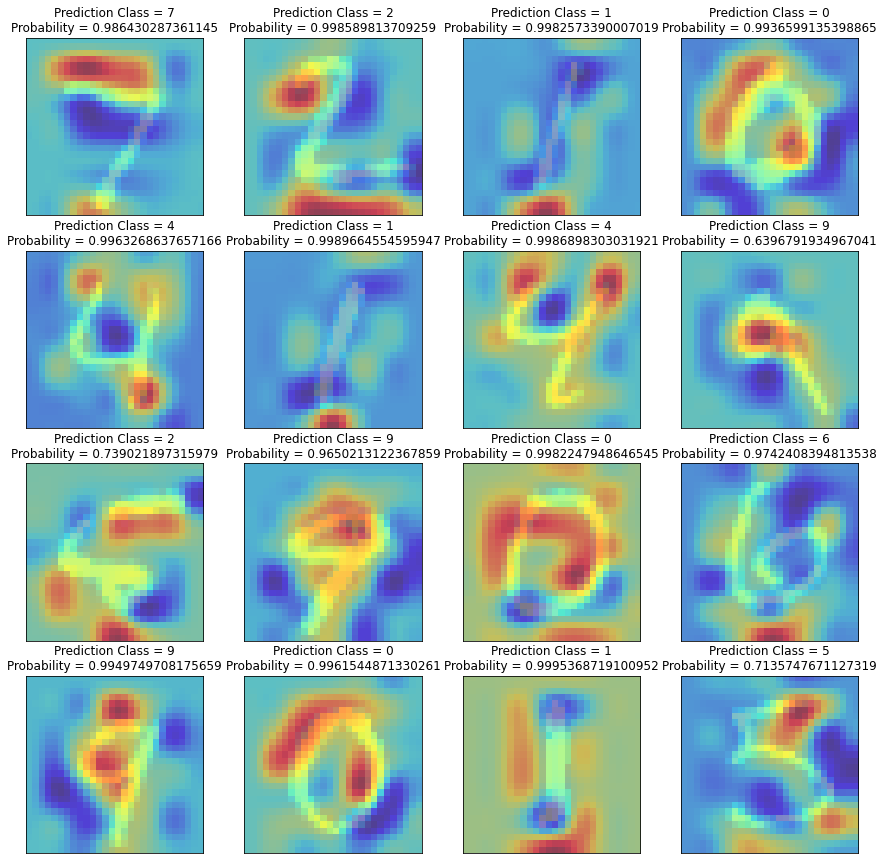

In [20]:
fig, axes = plt.subplots(4, 4, figsize = (15, 15))

for ax_idx, ax in enumerate(axes.flat):
    features_for_img = features[ax_idx, :, :, :]
    prediction = np.argmax(results[ax_idx])
    class_activation_weights = gap_weights[:, prediction]
    class_activation_features = scipy.ndimage.zoom(features_for_img, (28 / 7, 28 / 7, 1), order = 2)
    cam_output = np.dot(class_activation_features, class_activation_weights)
    ax.set_title('Prediction Class = {}\nProbability = {}'.format(prediction, results[ax_idx, prediction]))
    ax.imshow(np.squeeze(test_x[ax_idx], -1), alpha = 0.5)
    ax.imshow(cam_output, alpha = 0.5, cmap = plt.cm.jet)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)